In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


# EDA(Exploratory Data Analysis):

In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#PITCHING STATISTICS :


W - Wins 
R - Runs Score
AB - At Bat
H - Hits
2B - Doubles
3B - Triples
HR - Home Runs
BB - Base on Balls
SO - Strike Outs
SB - Stolen Balls
RA - Runs Average
ER - Earned Runs
ERA - Earned Run Average
CG - Complete Game
SHO - Shut Outs
SV - Saves
E - Errors

In [4]:
df.shape

(30, 17)

In [5]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [7]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

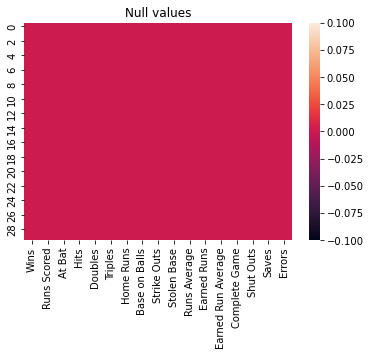

In [8]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [9]:
df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


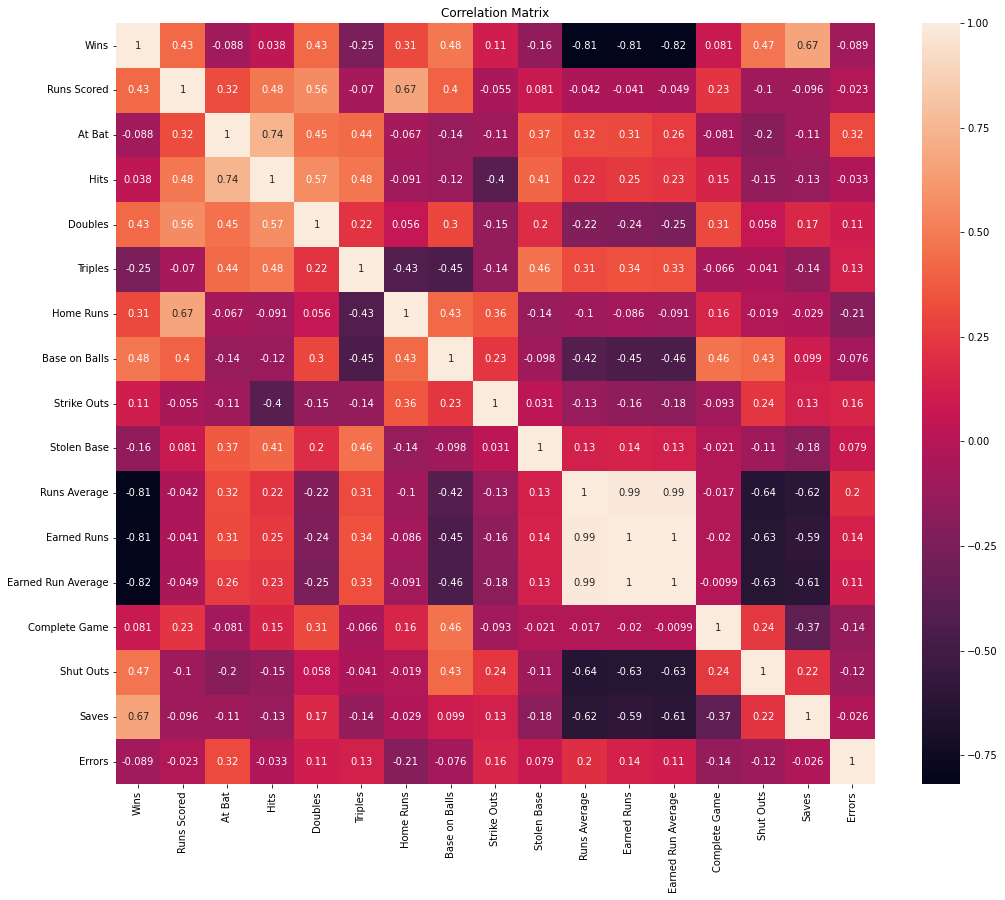

In [10]:
corr_mat=df.corr()
plt.figure(figsize=[17,14])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [13]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

In [14]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

# VISUALIZATION 
SCATTER PLOT:

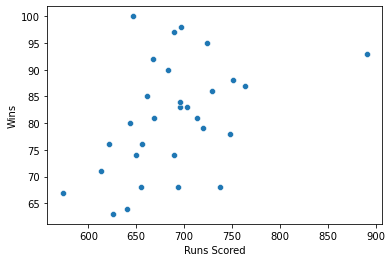

In [15]:
sns.scatterplot(x = 'Runs Scored', y = 'Wins', data = df)
plt.show()

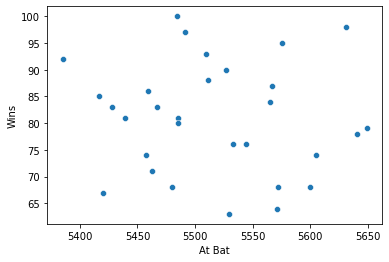

In [16]:
sns.scatterplot(x = 'At Bat' , y= 'Wins', data=df)
plt.show()

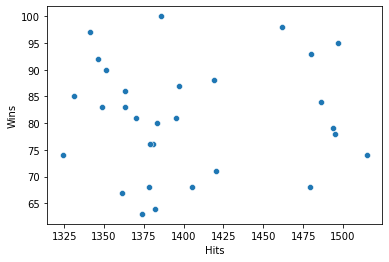

In [17]:
sns.scatterplot(x = 'Hits' , y = 'Wins', data=df)
plt.show()

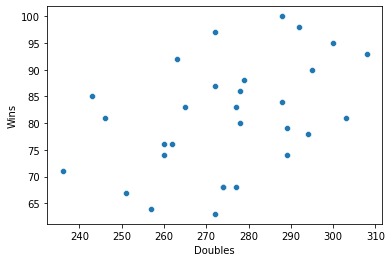

In [18]:
sns.scatterplot(x = 'Doubles' , y = 'Wins', data=df)
plt.show()

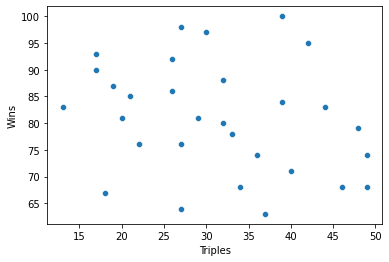

In [19]:
sns.scatterplot(x = 'Triples' , y = 'Wins', data=df)
plt.show()

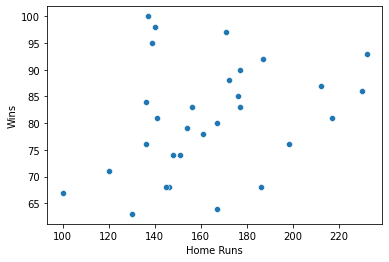

In [20]:
sns.scatterplot(x = 'Home Runs' , y = 'Wins', data=df)
plt.show()

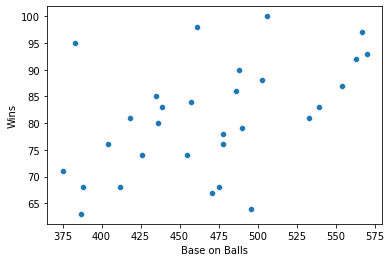

In [21]:
sns.scatterplot(x = 'Base on Balls' , y = 'Wins', data=df)
plt.show()

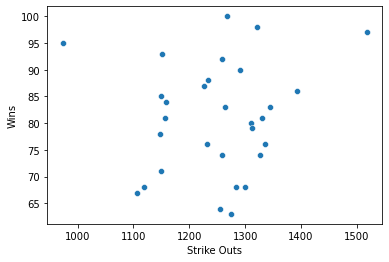

In [22]:
sns.scatterplot(x = 'Strike Outs' , y = 'Wins', data=df)
plt.show()

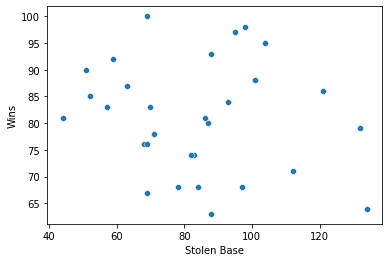

In [23]:
sns.scatterplot(x = 'Stolen Base' , y = 'Wins', data=df)
plt.show()

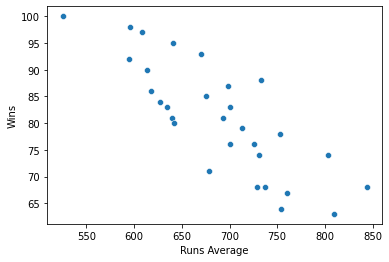

In [24]:
sns.scatterplot(x= 'Runs Average' , y = 'Wins', data=df)
plt.show()

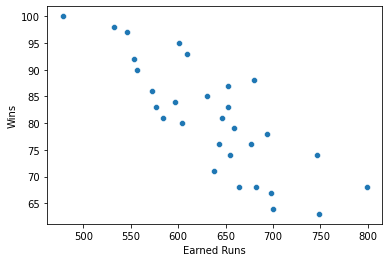

In [25]:
sns.scatterplot(x = 'Earned Runs' , y = 'Wins', data=df)
plt.show()

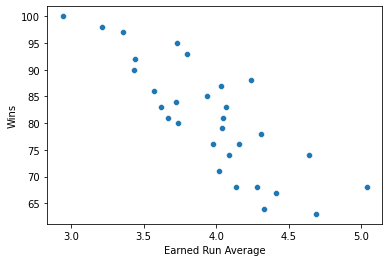

In [26]:
sns.scatterplot(x = 'Earned Run Average' , y = 'Wins', data=df)
plt.show()

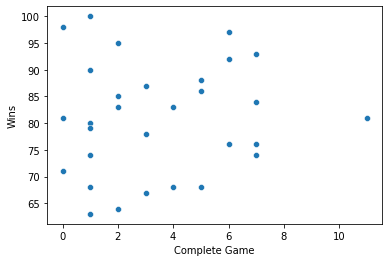

In [27]:
sns.scatterplot(x = 'Complete Game' , y = 'Wins', data= df)
plt.show()

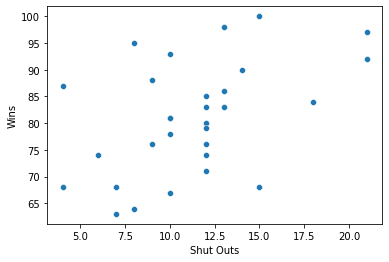

In [28]:
sns.scatterplot(x= 'Shut Outs' , y = 'Wins', data=df)
plt.show()

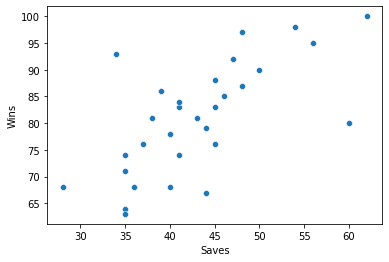

In [29]:
sns.scatterplot(x = 'Saves' , y= 'Wins', data=df)
plt.show()

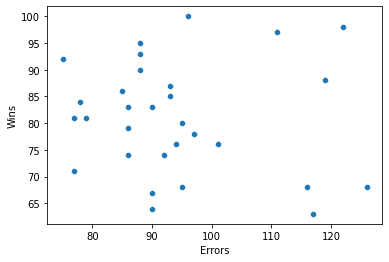

In [30]:
sns.scatterplot(x = 'Errors' , y = 'Wins', data=df)
plt.show()

# MULTIVARIATE ANALYSIS:

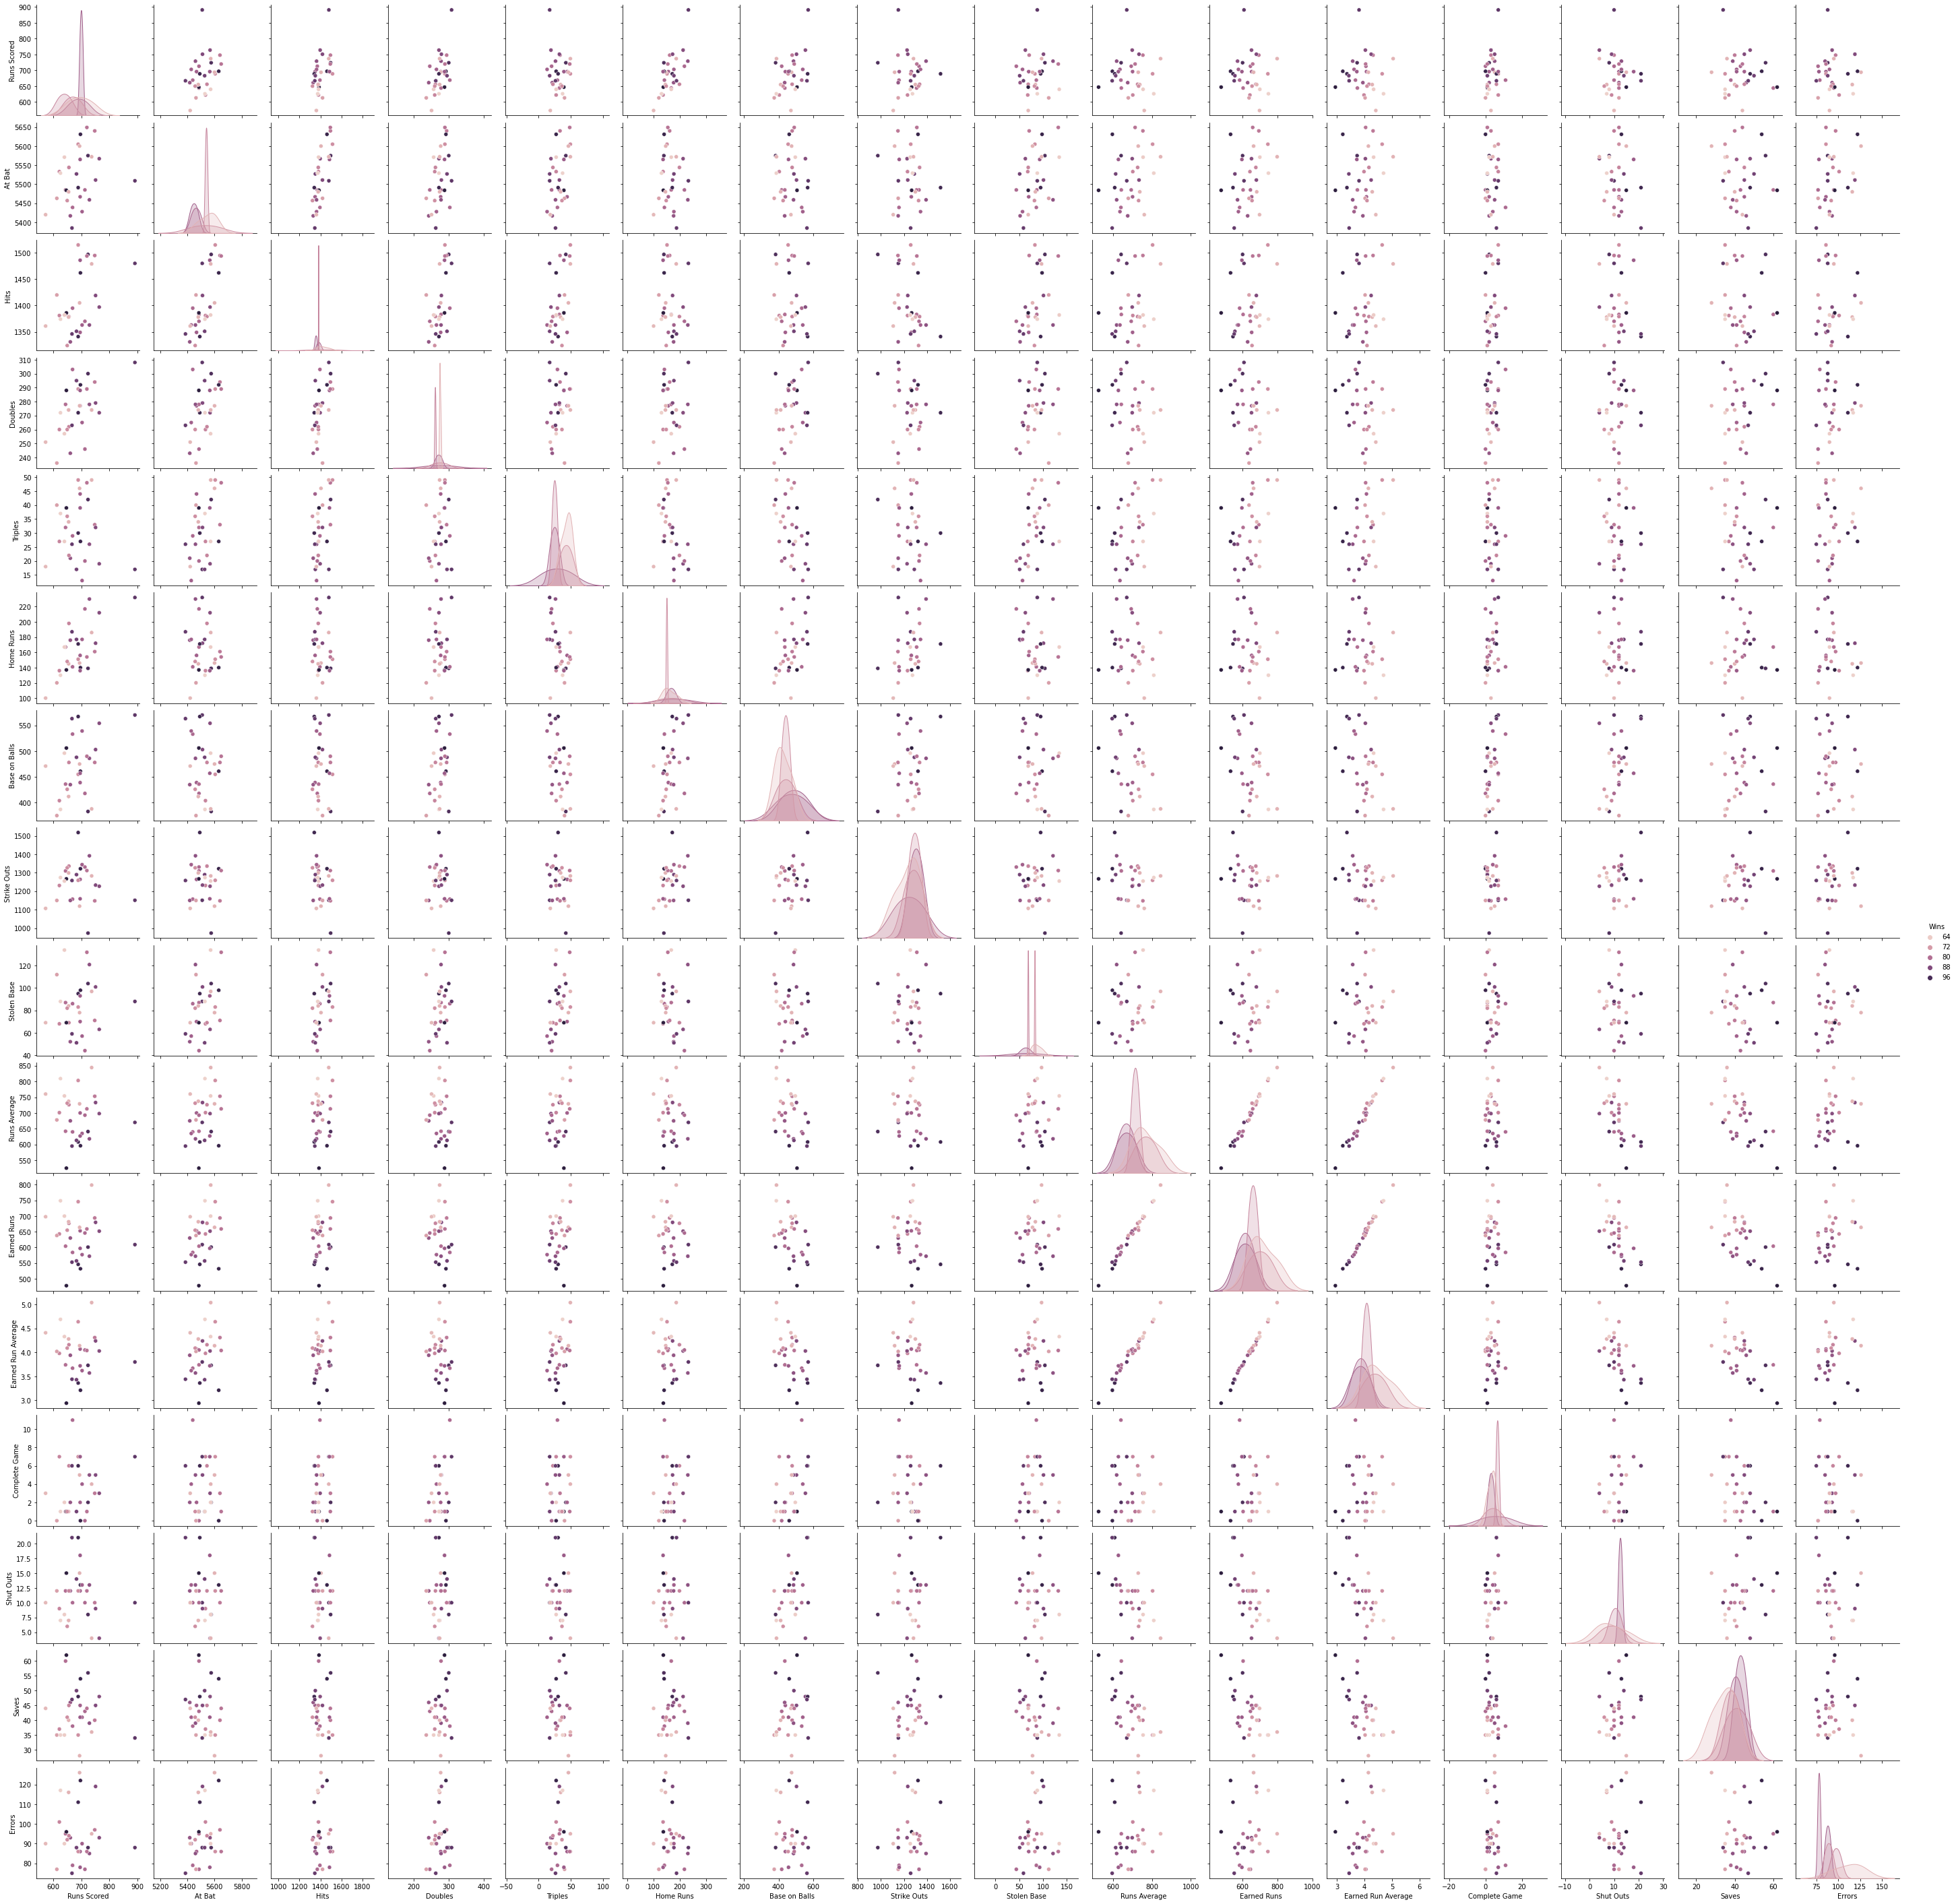

In [31]:
sns.pairplot(df, hue="Wins" )
plt.show()

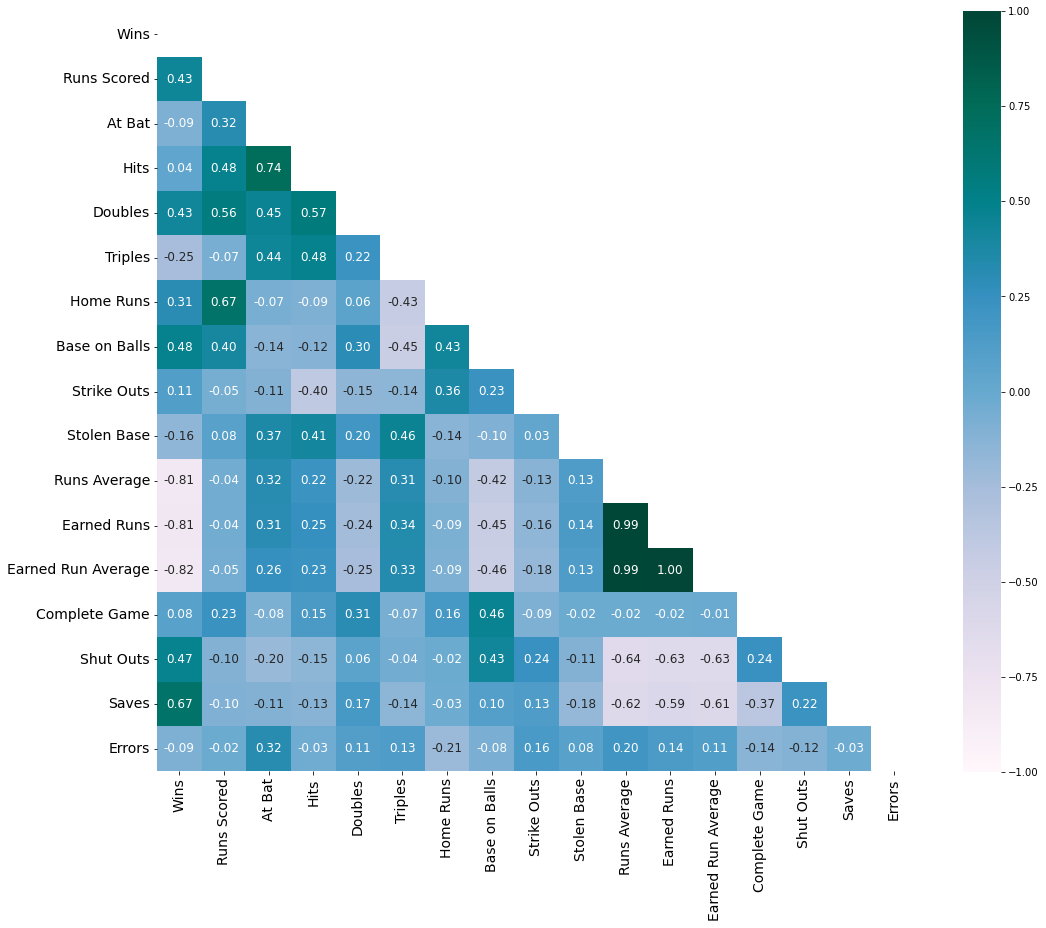

In [34]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,14))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':12}, cmap="PuBuGn", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

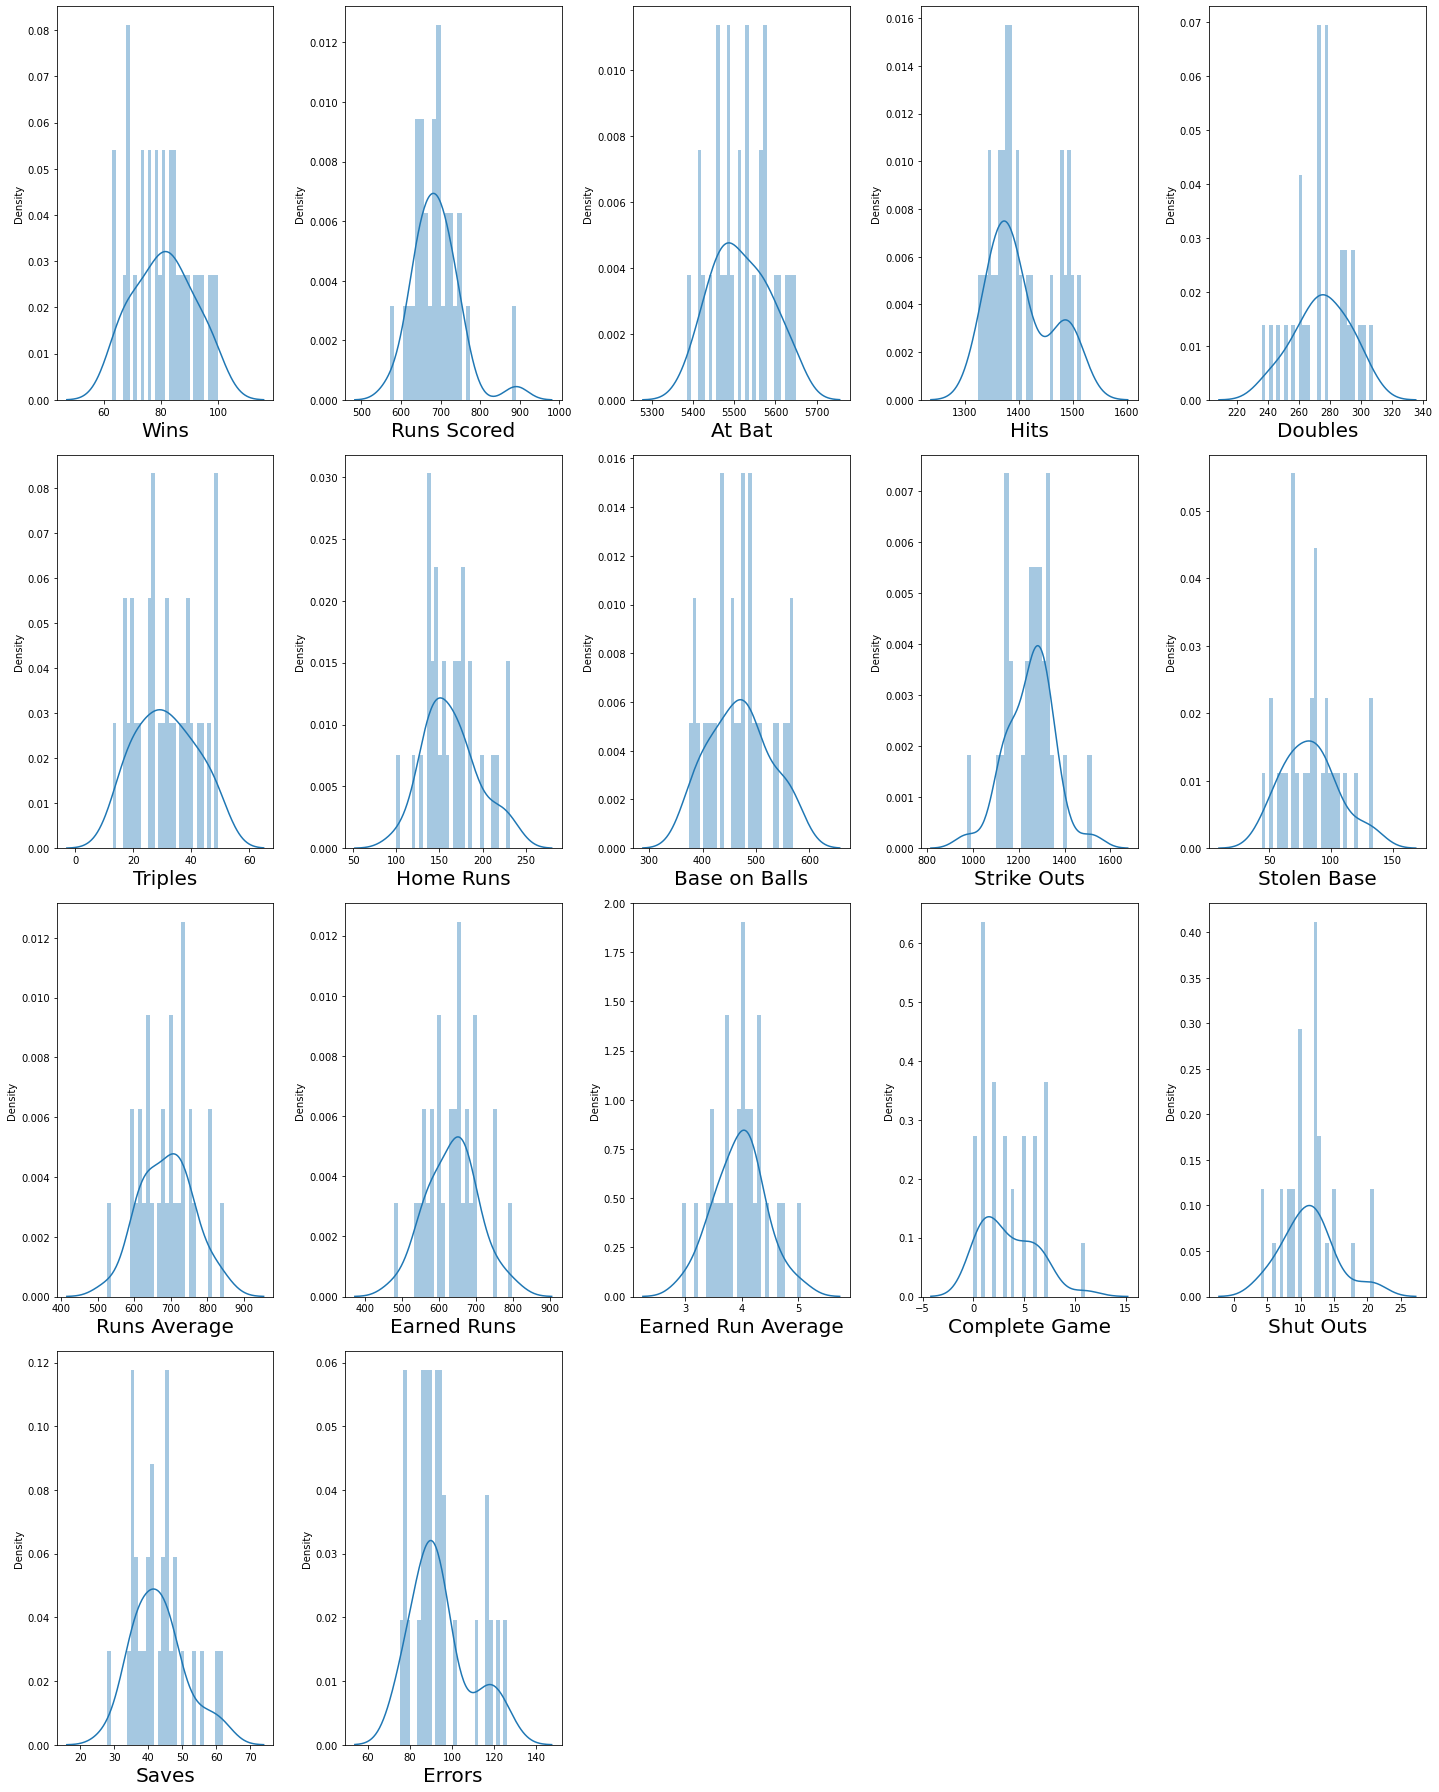

In [37]:
plt.figure(figsize = (20,25))
index = 1
for i in df:
    if index <=17:
        ax = plt.subplot(4,5,index)
        sns.distplot(df[i], bins=30)
        plt.xlabel(i,fontsize = 20)
    index+=1
plt.tight_layout()

In [39]:
#check the skewness
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

In [40]:
#lets seperat our data into label and features
X = df.drop(columns = "Wins", axis = 1)
Y = df["Wins"]

In [41]:
#Lets treat the skewed data
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<-0.5:
        X[index]=np.square(X[index])

In [42]:
#check skewness again after treating
X.skew()

Runs Scored           0.744813
At Bat                0.183437
Hits                  0.628584
Doubles              -0.230650
Triples               0.129502
Home Runs            -0.009528
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game        -0.325962
Shut Outs            -0.093545
Saves                 0.163057
Errors                0.632916
dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.665329,0.847731,1.649382,1.420173,1.041193,-0.763978,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.278921,-0.789565,1.581273,-0.427060
1,0.179562,-0.711094,-0.981656,0.127403,1.235809,-0.157077,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.278921,0.267953,0.336185,-0.591693
2,-0.307704,-1.115233,-0.134210,1.588795,-0.223808,-0.688861,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.762778,-0.232712,-0.622441,-1.199289
3,-1.204730,0.241522,-0.389136,-0.828122,-0.418423,-0.878690,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.165619,-0.503258,-0.773282,0.560495
4,0.055070,1.280738,1.951480,0.801892,1.722347,-0.328473,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.165619,0.267953,-1.087253,-0.591693
5,3.221983,-0.104884,1.360715,1.869832,-1.391501,1.933613,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.165619,-0.232712,-1.250843,-0.427060
6,1.327687,0.732263,-0.098001,-0.153633,-1.196885,1.458347,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.144769,-2.140778,0.703068,-0.031141
7,0.476767,-0.451289,-0.591253,-1.615025,-1.099578,1.581221,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.896930,-0.232712,0.078051,-1.382679
8,-0.776713,-0.451289,-0.352560,0.183611,0.068115,0.201536,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.876080,0.267953,1.975123,0.121359
9,1.066997,1.785913,1.615591,1.082929,0.165423,0.008945,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.144769,-0.232712,-0.332028,0.270716


# BEST RANDOMSTATE:

In [59]:
#Lets find best random state using LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
max_r_score=0
r_state = 0
for i in range(4,1000):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30,random_state = r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8784277602975863 on Random State 6


In [60]:
#training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [61]:
#Regression 

def dre(mod, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    mod.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = mod.predict(X_test)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cvscore = (cross_val_score(mod, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cvscore)
    
     # RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("Root-mean-square deviation Score is:", rmse)
        
    # Result of r2 score minus cv score
    result = r2 - cvscore
    print("R2 Score - Cross Validation Score is", result)

In [62]:
#Linear Regression Model

mod=LinearRegression()
dre(mod, X, Y)

R2 Score is: -75.36767777666084
Cross Validation Score: -16.752638840055177
Root-mean-square deviation Score is: 14.78257647467149
R2 Score - Cross Validation Score is -58.615038936605664


In [63]:
#Ridge Regression

mod=Ridge()
dre(mod, X, Y)

R2 Score is: 54.33175510583681
Cross Validation Score: 45.38044155922741
Root-mean-square deviation Score is: 7.543667180893267
R2 Score - Cross Validation Score is 8.951313546609406


In [64]:
#Lasso Regression

mod=Lasso()
dre(mod, X, Y)

R2 Score is: 78.07049625504618
Cross Validation Score: 56.87419866914878
Root-mean-square deviation Score is: 5.2274484748477965
R2 Score - Cross Validation Score is 21.196297585897398


In [65]:
#Support Vector Regression

mod=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dre(mod, X, Y)

R2 Score is: -0.9513377719426952
Cross Validation Score: -13.509284021618187
Root-mean-square deviation Score is: 11.21582948567589
R2 Score - Cross Validation Score is 12.557946249675492


In [66]:
#Decision Tree Regressor

mod=DecisionTreeRegressor(criterion="poisson", random_state=111)
dre(mod, X, Y)

R2 Score is: -3.523510971786825
Cross Validation Score: -81.208749514949
Root-mean-square deviation Score is: 11.357816691600547
R2 Score - Cross Validation Score is 77.68523854316219


In [67]:
#KNeighbors Regressor

mod=KNeighborsRegressor()
dre(mod, X, Y)

R2 Score is: 53.089404388714755
Cross Validation Score: -22.170742118394124
Root-mean-square deviation Score is: 7.645586962424793
R2 Score - Cross Validation Score is 75.26014650710889


In [68]:
#AdaBoost Regressor

mod=AdaBoostRegressor()
dre(mod, X, Y)

R2 Score is: 67.58769112660737
Cross Validation Score: -66.03177866917925
Root-mean-square deviation Score is: 6.355216401524348
R2 Score - Cross Validation Score is 133.6194697957866


In [69]:
#Extra Trees Regressor

mod=ExtraTreesRegressor()
dre(mod, X, Y)

R2 Score is: 65.14077492163008
Cross Validation Score: -57.279344786409055
Root-mean-square deviation Score is: 6.590740663992174
R2 Score - Cross Validation Score is 122.42011970803914


# HYPER PARAMETER TUNING:

In [80]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

In [81]:
GCV =  GridSearchCV(estimator = Ridge(), cv = 5, param_grid=dict(alpha=alphas))
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [82]:
GCV.best_params_

{'alpha': 1.0}

In [83]:
#Lets check the final model accuracy
model = Ridge(alpha = 1.0, normalize = True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# evaluation
print("r2 score :", r2_score(y_test,y_pred))
print('--------------------------------------------')

r2 score : 0.7196561106161037
--------------------------------------------


got the accuracy 71 %

# SAVING THE MODEL:

In [85]:
import joblib
joblib.dump(model,'baseball.pkl')

['baseball.pkl']